# Machine Intelligence 1 - Ecercise Sheet 2

## Connectionist Neurons & Function Fitting

## Group: BCCN MI 2022 

### Myriam Hamon, Arina Belova, Luisa Drescher

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [5]:
# load the data
df = pd.read_csv('applesOranges.csv') 
df

,x.1,x.2,y
0,0.365,0.708,0
1,0.543,-0.268,0
2,-0.401,0.643,0
3,0.866,-0.796,0
4,-0.386,0.742,0
...,...,...,...
195,0.784,0.616,1
196,0.411,-0.005,1
197,0.930,0.225,1
198,1.288,0.184,1


Let's look at the data:

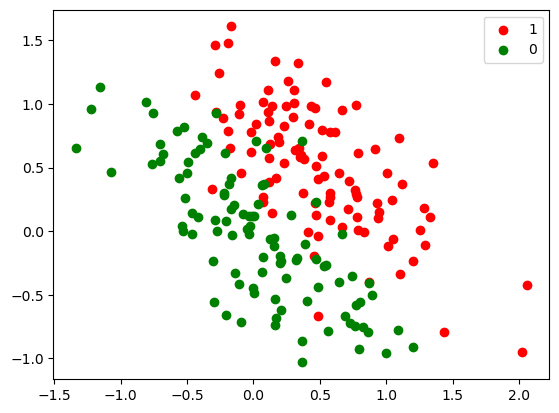

In [6]:
plt.scatter(list(df[df["y"] == 1]['x.1'].values), list(df[df["y"] == 1]['x.2'].values), c = "r", label="1")
plt.scatter(list(df[df["y"] == 0]['x.1'].values), list(df[df["y"] == 0]['x.2'].values), c = "g", label="0")
plt.legend()
plt.show()

Creating the 19 weight vectors:

In [7]:
angles = np.linspace(0,np.pi,19)
xaxis = np.cos(angles)
yaxis = np.sin(angles)

In [8]:
w_vec_arr = list(zip(xaxis,yaxis))  
w_vec_arr

[(1.0, 0.0),
 (0.984807753012208, 0.17364817766693033),
 (0.9396926207859084, 0.3420201433256687),
 (0.8660254037844387, 0.49999999999999994),
 (0.766044443118978, 0.6427876096865393),
 (0.6427876096865394, 0.766044443118978),
 (0.5000000000000001, 0.8660254037844386),
 (0.3420201433256688, 0.9396926207859083),
 (0.17364817766693041, 0.984807753012208),
 (6.123233995736766e-17, 1.0),
 (-0.1736481776669303, 0.984807753012208),
 (-0.3420201433256687, 0.9396926207859084),
 (-0.4999999999999998, 0.8660254037844387),
 (-0.6427876096865394, 0.766044443118978),
 (-0.7660444431189779, 0.6427876096865395),
 (-0.8660254037844387, 0.49999999999999994),
 (-0.9396926207859083, 0.3420201433256689),
 (-0.984807753012208, 0.1736481776669307),
 (-1.0, 1.2246467991473532e-16)]

Checking if the norm is 1 for every weight pair.

In [9]:
for w in w_vec_arr:
    print(w[0]**2 + w[1]**2)
    assert np.logical_and(w[0] >= -1, w[0] <= 1)
    assert np.logical_and(w[1] >= 0, w[1] <= 1) 

1.0
0.9999999999999999
1.0
1.0
0.9999999999999999
1.0
1.0
0.9999999999999999
0.9999999999999999
1.0
0.9999999999999999
1.0
0.9999999999999999
1.0
1.0
1.0
0.9999999999999999
1.0
1.0


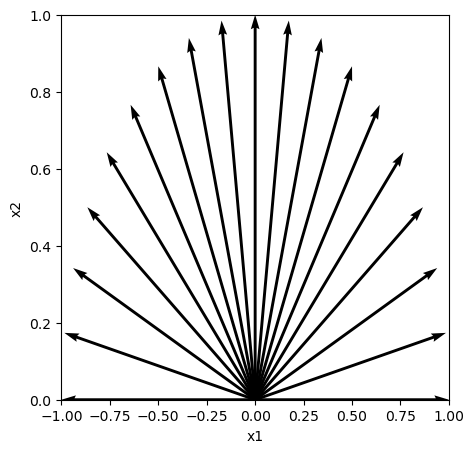

In [15]:
plt.figure(figsize=(5,5))
for w_vec in w_vec_arr:
    plt.quiver(0, 0, w_vec[0], w_vec[1],angles='xy', scale_units='xy', scale=1)

plt.xlabel("x1")
plt.ylabel("x2")
plt.xlim(-1,1)
plt.ylim(0,1)
plt.show()

In [8]:
# transfer function
sign_function = lambda x: 1 if x >= 0 else 0

In [9]:
#classification = lambda w, x, theta: sign_function(np.dot(w,x) - theta)
def classification(w,the_data,theta):
    y_pred = []
    for data_point in the_data:
        y_pred.append(sign_function(np.dot(w,data_point) - theta))
    return y_pred    

In [10]:
per_correct_predictions = lambda pred_res, true_res : (sum(1 for i,j in zip(pred_res, true_res) if i == j)) / len(true_res)

If bias = 0:

In [11]:
vector_performance = []

the_data = df.iloc[:,:2].values # two first columns of dataframe corresponds to x.1 and x.2
true_labels = df.iloc[:,2].values # last column of a dataframe is a true label y
theta = 0

for w_vec in w_vec_arr:
    vector_performance.append((w_vec, per_correct_predictions(classification(w_vec, the_data, theta), true_labels)))

In [12]:
vector_performance

[((1.0, 0.0), 0.675),
 ((0.984807753012208, 0.17364817766693033), 0.705),
 ((0.9396926207859084, 0.3420201433256687), 0.76),
 ((0.8660254037844387, 0.49999999999999994), 0.745),
 ((0.766044443118978, 0.6427876096865393), 0.71),
 ((0.6427876096865394, 0.766044443118978), 0.735),
 ((0.5000000000000001, 0.8660254037844386), 0.755),
 ((0.3420201433256688, 0.9396926207859083), 0.75),
 ((0.17364817766693041, 0.984807753012208), 0.725),
 ((6.123233995736766e-17, 1.0), 0.69),
 ((-0.1736481776669303, 0.984807753012208), 0.63),
 ((-0.3420201433256687, 0.9396926207859084), 0.6),
 ((-0.4999999999999998, 0.8660254037844387), 0.565),
 ((-0.6427876096865394, 0.766044443118978), 0.52),
 ((-0.7660444431189779, 0.6427876096865395), 0.505),
 ((-0.8660254037844387, 0.49999999999999994), 0.465),
 ((-0.9396926207859083, 0.3420201433256689), 0.42),
 ((-0.984807753012208, 0.1736481776669307), 0.35),
 ((-1.0, 1.2246467991473532e-16), 0.325)]

In [13]:
# A bit of dumb code to get values for the plot
angles = np.arange(0, 181, 10)
perf = [p[1] for p in vector_performance]

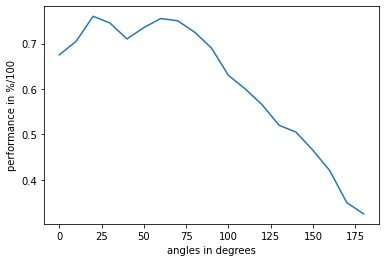

In [14]:
fig = plt.figure()
plt.plot(angles, perf)
plt.xlabel("angles in degrees")
plt.ylabel("performance in %/100")
plt.show()

As you can see, the performance of the model using a bias=0 is better of the angle is smaller and decreases as the angle gets larger.

 #### Task 1(c)
 The best performance belongs to the weight vector:

In [15]:
the_chosen_weight_tuple = max(vector_performance, key = lambda x : x[1])
print(the_chosen_weight_tuple)
# It is 20 deg to the horizontal axis weight vector
the_chosen_weight = the_chosen_weight_tuple[0]

((0.9396926207859084, 0.3420201433256687), 0.76)


Now we use these weights and vary the value of theta:

In [16]:
theta_arr = np.arange(-3,4,step=1)

In [17]:
results_varied_theta = []
for theta in theta_arr:
    results_varied_theta.append((theta, per_correct_predictions(classification(the_chosen_weight, the_data, theta),true_labels)))

In [18]:
results_varied_theta

[(-3, 0.5), (-2, 0.5), (-1, 0.505), (0, 0.76), (1, 0.575), (2, 0.5), (3, 0.5)]

Using this set of weights, using a bias = 0 results in the best performance of the model.




In [19]:
# best result for theta = 0
best_results = classification(the_chosen_weight, the_data, 0)

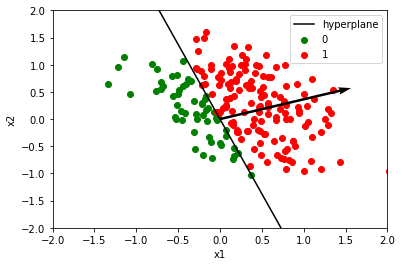

In [20]:
cdict = {0: 'green', 1: 'red'}

fig, ax = plt.subplots()
for res in np.unique(best_results):
    ix = np.where(best_results == res)
    ax.scatter(the_data[:,0][ix], the_data[:,1][ix], c = cdict[res], label = res)

    
x_1 = np.linspace(-1,1,50)
x_2 = (0 - the_chosen_weight[0] * x_1) / the_chosen_weight[1] # (theta - (w1 * x_1)) / w2
plt.plot(x_1,x_2, c="black", label="hyperplane")

# Plot the weight vector
plt.quiver(0, 0, the_chosen_weight[0], the_chosen_weight[1], angles='xy', scale_units='xy', scale=0.6)

plt.xlabel("x1")
plt.ylabel("x2") 
plt.xlim(-2,2)
plt.ylim(-2,2)   
ax.legend()
plt.show()

This combination of weights and theta tried to linealy separate the data and to give priority to the class "1" in the intersection region between class 1 and 0. There are much more class 1 data points in the intersection region than class 0 ones. There is a clear hyperplane going through the origin and dividing the data into these two classes.

The weight vector is pointing towards class 1 and is orthogonal to the decision boundray. 

#### Task (e)

Exploring all possible combinations of weights and theta:

In [21]:
angles_thetas = []
for theta in theta_arr:
    results_for_theta = []
    for w_vec in w_vec_arr:
        results_for_theta.append(per_correct_predictions(classification(w_vec, the_data, theta),true_labels))
    angles_thetas.append(results_for_theta)    

In [22]:
angles_thetas = np.array(angles_thetas)

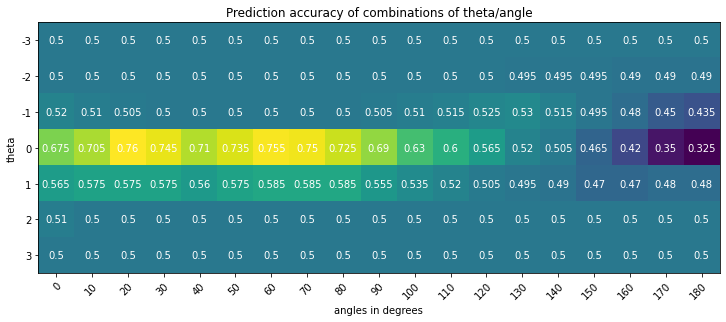

In [23]:
fig, ax = plt.subplots(figsize=(10,10))
 
im = ax.imshow(angles_thetas)

ax.set_xticks(np.arange(len(angles)))
ax.set_yticks(np.arange(len(theta_arr)))
ax.set_xticklabels(np.arange(0,181,10))
ax.set_yticklabels(theta_arr)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

for i in range(len(theta_arr)):
    for j in range(len(angles)):
        text = ax.text(j, i, angles_thetas[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Prediction accuracy of combinations of theta/angle")
fig.tight_layout()
plt.xlabel("angles in degrees")
plt.ylabel("theta")  
plt.show()

The best performance is given by theta = 0 and gamma = 20.

#### Task (f)

Remark: We are very confused why the name "grid search" is used for the technique of finding optimal weights and bias/theta term. To us, grid search is about finding the best hyperparameters and not training the algorithm itself.

About the question itself, this "grid search optimisation" of learnable parameters (w and theta) cannot be applied to a high dimensional data, since we do not want to do the search of complexity of order n where n -> infinity. Application example: genomic data.

This grid search does not guarantee that we will find the optimal combination of weights and bias term if we did not include them in our search space.

In the above two examples grid search will fail.

additional: Moreover, we think this procedure cannot be applied to a classification problem which does not converge as XOR problem for a simple perceptron. Instead of kind of "good region" in a heatmap with higher performance as we have above we will have just alternating sequence of weights with same performances. 